### Analyzing MLB team performance trends pre- and post-CBT

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import scipy.stats as stats



In [2]:
#Importing data

team_salary_tax = pd.read_csv('Output/team_salary_tax.csv')
team_salary_tax['treated'] = np.where(team_salary_tax['yearID']<1997,0,1)
team_salary_tax['total_player_salaries_100k'] = team_salary_tax['total_player_salaries']/100000

team_salary_tax.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,med_player_salary,min_player_salary,max_player_salary,salary_var,Salary Rank,Threshold,over_threshold,times_over_threshold,treated,total_player_salaries_100k
0,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,620833.5,120000,1625000,1.576369e+11,1,0.0,0,0,0,148.07000
1,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,497916.5,60000,1472819,1.017152e+11,6,0.0,0,0,0,115.60712
2,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,325000.0,115000,1075000,8.910658e+10,10,0.0,0,0,0,108.97560
3,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,493750.0,60000,1100000,9.319582e+10,2,0.0,0,0,0,144.27894
4,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,333333.0,60000,1242333,1.184021e+11,15,0.0,0,0,0,98.46178


In [3]:
team_salary_tax.describe()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,...,med_player_salary,min_player_salary,max_player_salary,salary_var,Salary Rank,Threshold,over_threshold,times_over_threshold,treated,total_player_salaries_100k
count,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,...,8.060000e+02,806.000000,8.060000e+02,8.060000e+02,806.000000,8.060000e+02,806.000000,806.000000,806.000000,806.000000
mean,2000.000000,3.146402,159.813896,79.893300,80.337469,79.426799,729.755583,5465.967742,1429.858561,274.428040,...,9.223391e+05,238972.776675,9.177996e+06,9.594521e+12,13.500000,6.609677e+07,0.045906,0.557072,0.612903,582.361904
std,8.949826,1.625390,8.927735,4.572511,11.850215,11.793102,90.755537,308.460056,107.359626,34.715084,...,8.689924e+05,150893.932387,6.642174e+06,1.312066e+13,7.504657,7.943407e+07,0.209411,1.669185,0.487389,429.028387
min,1985.000000,1.000000,112.000000,44.000000,43.000000,40.000000,466.000000,3856.000000,963.000000,159.000000,...,9.875000e+04,0.000000,6.000000e+05,2.523706e+10,1.000000,0.000000e+00,0.000000,0.000000,0.000000,8.800000
25%,1992.000000,2.000000,162.000000,81.000000,72.000000,71.000000,666.250000,5468.000000,1377.000000,253.000000,...,3.375000e+05,109000.000000,3.550000e+06,9.858384e+11,7.000000,0.000000e+00,0.000000,0.000000,0.000000,234.871668
50%,2000.000000,3.000000,162.000000,81.000000,81.000000,79.000000,729.000000,5524.000000,1435.000000,275.000000,...,5.612500e+05,200000.000000,7.915266e+06,4.102915e+12,13.500000,0.000000e+00,0.000000,0.000000,1.000000,480.372430
75%,2008.000000,4.000000,162.000000,81.000000,89.000000,88.000000,790.000000,5584.750000,1495.000000,297.000000,...,1.200000e+06,390000.000000,1.350000e+07,1.356824e+13,20.000000,1.550000e+08,0.000000,0.000000,1.000000,831.809998
max,2015.000000,7.000000,164.000000,84.000000,116.000000,119.000000,1009.000000,5781.000000,1684.000000,376.000000,...,5.833334e+06,514000.000000,3.300000e+07,8.588077e+13,26.000000,1.890000e+08,1.000000,17.000000,1.000000,2319.788860


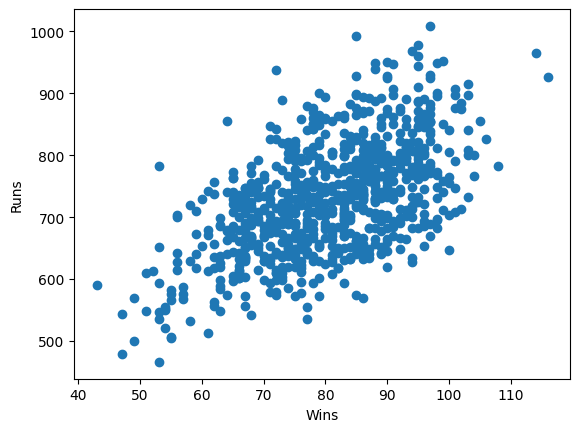

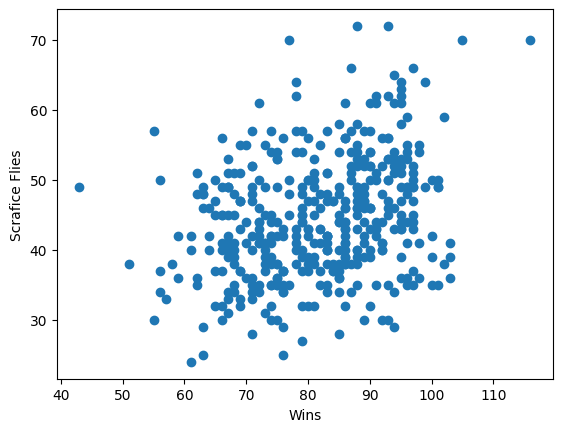

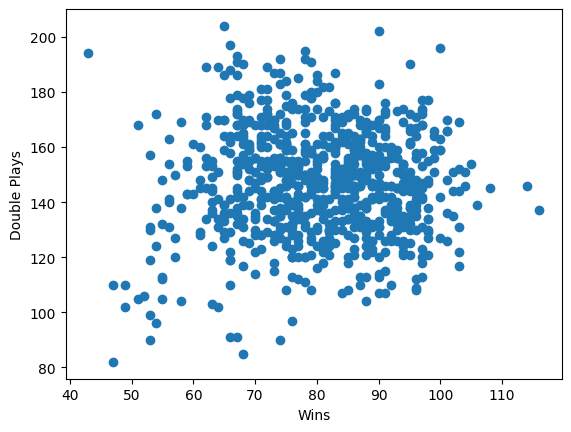

In [4]:
# Relationship btwn performance stats and wins

plt.scatter(team_salary_tax['W'],team_salary_tax['R'])
plt.xlabel('Wins')
plt.ylabel('Runs')
plt.show()

plt.scatter(team_salary_tax['W'],team_salary_tax['SF'])
plt.xlabel('Wins')
plt.ylabel('Scrafice Flies')
plt.show()

plt.scatter(team_salary_tax['W'],team_salary_tax['DP'])
plt.xlabel('Wins')
plt.ylabel('Double Plays')
plt.show()

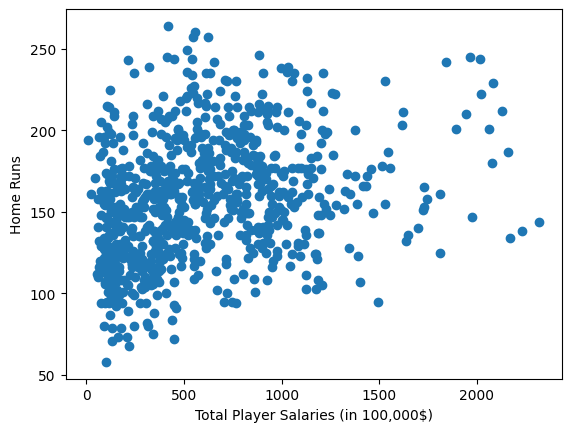

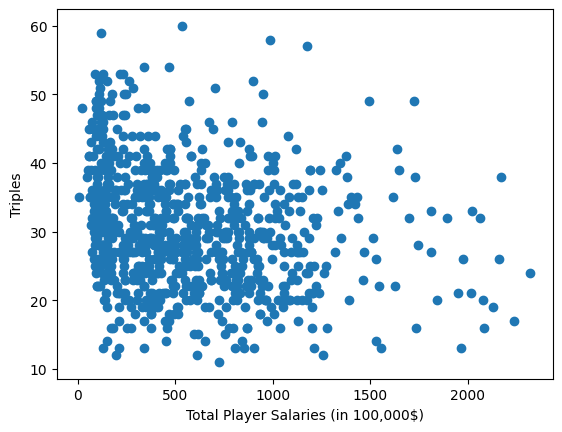

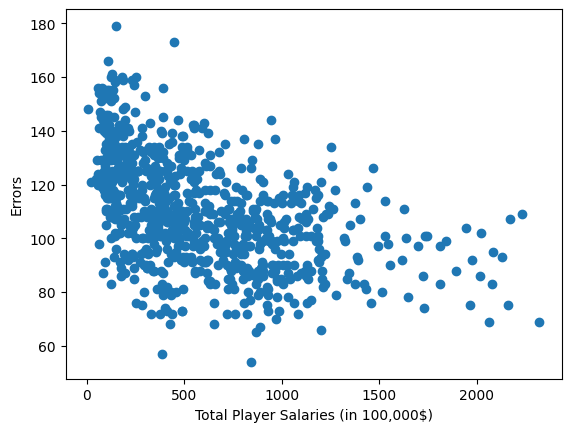

In [5]:
#Relationship btwn performance stats and team salary 
plt.scatter(team_salary_tax['total_player_salaries_100k'],team_salary_tax['HR'])
plt.xlabel('Total Player Salaries (in 100,000$)')
plt.ylabel('Home Runs')
plt.show()

plt.scatter(team_salary_tax['total_player_salaries_100k'],team_salary_tax['3B'])
plt.xlabel('Total Player Salaries (in 100,000$)')
plt.ylabel('Triples')
plt.show()

plt.scatter(team_salary_tax['total_player_salaries_100k'],team_salary_tax['E'])
plt.xlabel('Total Player Salaries (in 100,000$)')
plt.ylabel('Errors')
plt.show()

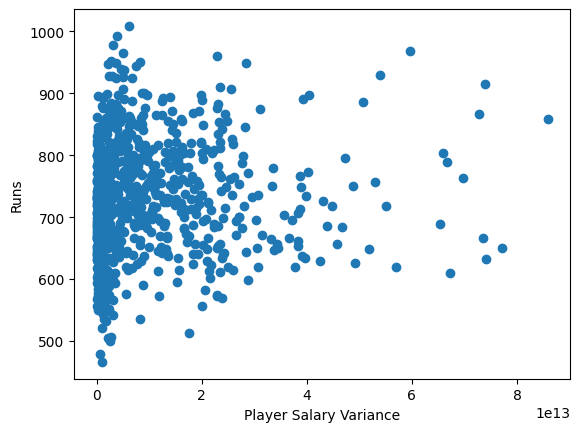

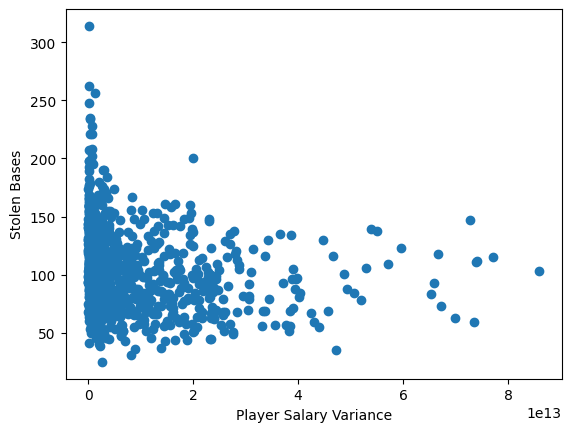

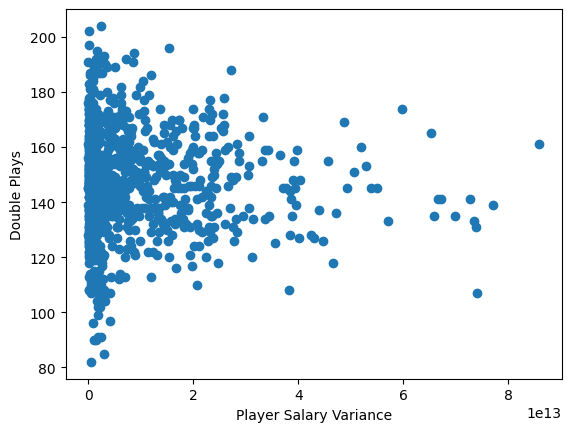

In [6]:
#Relationship btwn performance stats and team salary variance
plt.scatter(team_salary_tax['salary_var'],team_salary_tax['R'])
plt.xlabel('Player Salary Variance')
plt.ylabel('Runs')
plt.show()

plt.scatter(team_salary_tax['salary_var'],team_salary_tax['SB'])
plt.xlabel('Player Salary Variance')
plt.ylabel('Stolen Bases')
plt.show()

plt.scatter(team_salary_tax['salary_var'],team_salary_tax['DP'])
plt.xlabel('Player Salary Variance')
plt.ylabel('Double Plays')
plt.show()


In [7]:
team_salary_tax.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro', 'total_player_salaries',
       'med_player_salary', 'min_player_salary', 'max_player_salary',
       'salary_var', 'Salary Rank', 'Threshold', 'over_threshold',
       'times_over_threshold', 'treated', 'total_player_salaries_100k'],
      dtype='object')

### Using RandomForest Regressor to find which performance variables best relate to wins and team player salaries

In [8]:
# Pulling out feature and target variables

rf_df = team_salary_tax[['W','R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS',
                         'RA', 'ER', 'ERA', 'CG','SHO','SV', 'HA', 'HRA', 'BBA',
                           'SOA', 'E', 'DP', 'FP','total_player_salaries_100k']]


rf_df.isnull().sum()

W                             0
R                             0
AB                            0
H                             0
2B                            0
3B                            0
HR                            0
BB                            0
SO                            0
SB                            0
CS                            0
RA                            0
ER                            0
ERA                           0
CG                            0
SHO                           0
SV                            0
HA                            0
HRA                           0
BBA                           0
SOA                           0
E                             0
DP                            0
FP                            0
total_player_salaries_100k    0
dtype: int64

In [9]:
# Generating training and test samples

x = rf_df.drop(columns=['W', 'total_player_salaries_100k'])
y_wins = rf_df['W']
y_salary = rf_df['total_player_salaries_100k']

from sklearn.model_selection import train_test_split

training_w, testing_w, training_labels_w, testings_labels_w = train_test_split(x, y_wins,test_size = .5, random_state = 42)
training_s, testing_s, training_labels_s, testings_labels_s = train_test_split(x, y_salary,test_size = .5, random_state = 42)

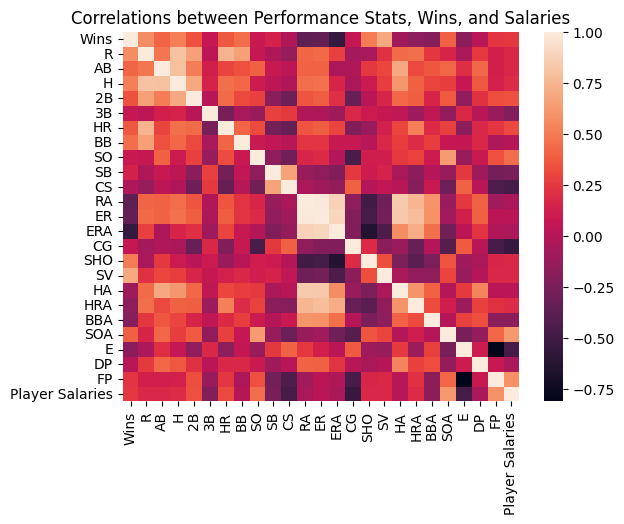

In [13]:
#Looking at relationships btwn vars
rf_df = rf_df.rename(columns={'total_player_salaries_100k': 'Player Salaries', 'W': "Wins"})

import seaborn
seaborn.heatmap(rf_df.corr(),xticklabels=rf_df.columns, yticklabels=rf_df.columns)
plt.title('Correlations between Performance Stats, Wins, and Salaries')

plt.savefig('Output/performance correlations.png')


In [14]:
#Running RF for wins and salary outcomes

from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf_w = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf_s = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf_w.fit(training_w, training_labels_w)
rf_s.fit(training_s, training_labels_s)

#Checking performance 
predictions_w = rf_w.predict(testing_w)
error_w = abs(predictions_w - testings_labels_w)
mape_w = 100 * (error_w / testings_labels_w)
accuracy_w = 100 - np.mean(mape_w)
print('Accuracy in estimating wins:', round(accuracy_w, 2), '%.')

predictions_s = rf_s.predict(testing_s)
error_s = abs(predictions_s - testings_labels_s)
mape_s = 100 * (error_s / testings_labels_s)
accuracy_s = 100 - np.mean(mape_s)
print('Accuracy in estimating salary:', round(accuracy_s, 2), '%.')


Accuracy in estimating wins: 95.37 %.
Accuracy in estimating salary: 36.97 %.


In [15]:
#Feature importance
importances_w = list(rf_w.feature_importances_)
feature_importances_w = [(feature, round(importance, 3)) for feature, importance in zip(x.columns, importances_w)]
# Sort the feature importances by most important first
feature_importances_w = sorted(feature_importances_w, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print('Variable importance for predicting wins')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_w]

print('-----------------------------------------------------------------------------------')

importances_s = list(rf_s.feature_importances_)
feature_importances_s = [(feature, round(importance, 3)) for feature, importance in zip(x.columns, importances_s)]
# Sort the feature importances by most important first
feature_importances_s = sorted(feature_importances_s, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print('Variable importance for predicting salary')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_s]


Variable importance for predicting wins
Variable: SV                   Importance: 0.473
Variable: R                    Importance: 0.198
Variable: ERA                  Importance: 0.084
Variable: RA                   Importance: 0.055
Variable: H                    Importance: 0.021
Variable: ER                   Importance: 0.019
Variable: BBA                  Importance: 0.019
Variable: BB                   Importance: 0.016
Variable: HA                   Importance: 0.016
Variable: SOA                  Importance: 0.013
Variable: HR                   Importance: 0.011
Variable: SHO                  Importance: 0.011
Variable: AB                   Importance: 0.01
Variable: 2B                   Importance: 0.008
Variable: 3B                   Importance: 0.006
Variable: SB                   Importance: 0.006
Variable: CG                   Importance: 0.006
Variable: HRA                  Importance: 0.006
Variable: E                    Importance: 0.006
Variable: SO                  

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [16]:
#Adding performance index to main df

team_salary_tax['rf_pred'] = rf_w.predict(x)

team_salary_tax.head()

team_salary_tax['W'].corr(team_salary_tax['rf_pred'])

0.9605599394364223

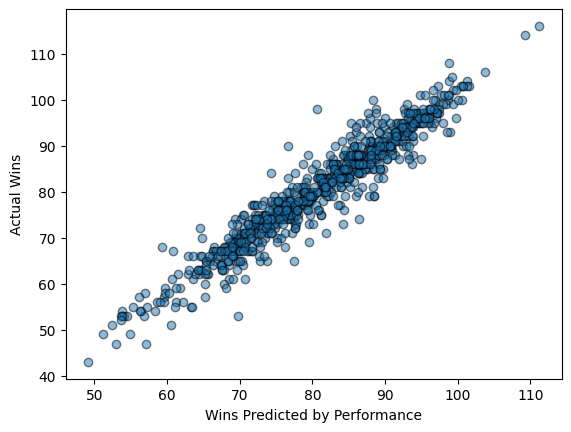

In [23]:
plt.scatter(team_salary_tax['rf_pred'], team_salary_tax['W'], alpha=.5, edgecolors='black')
plt.xlabel('Wins Predicted by Performance')
plt.ylabel('Actual Wins')

plt.savefig('Output/perdicted vs actual.png')


F test results for pre and post F_onewayResult(statistic=array([19.24913227]), pvalue=array([1.30000157e-05]))
F test results for pre and post 2003 F_onewayResult(statistic=array([14.92832029]), pvalue=array([0.0001229]))
Right tailed T test results for pre and post TtestResult(statistic=array([4.38738331]), pvalue=array([6.50000785e-06]), df=array([804.]))
Right tailed T test results for pre and post 2003 TtestResult(statistic=array([3.86371845]), pvalue=array([6.14519827e-05]), df=array([648.]))


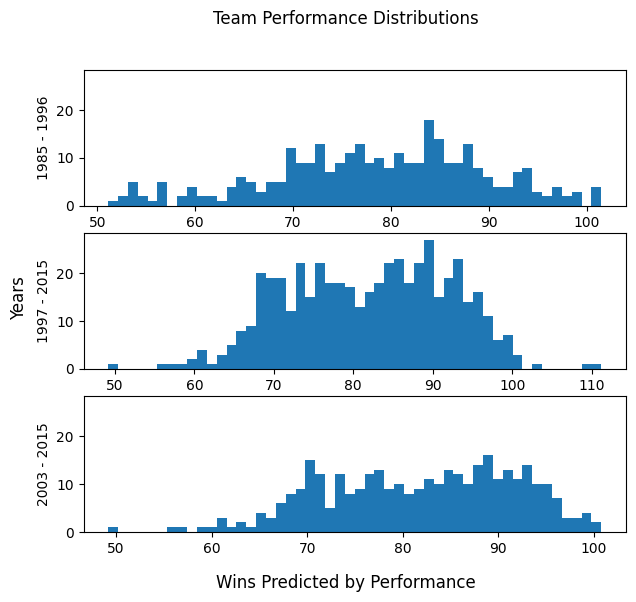

In [26]:
# Statistical tests on performance distributions pre- and post- tax rules

perf_pre = team_salary_tax.loc[team_salary_tax['yearID']<1997, ['rf_pred']]
perf_post = team_salary_tax.loc[team_salary_tax['yearID']>=1997, ['rf_pred']]
perf_post2003 = team_salary_tax.loc[team_salary_tax['yearID']>=2003, ['rf_pred']]

#Testing variances
print('F test results for pre and post', stats.f_oneway(perf_pre,perf_post))
print('F test results for pre and post 2003', stats.f_oneway(perf_pre,perf_post2003))

#Testing means (speficially if post is higher)
print('Right tailed T test results for pre and post', stats.ttest_ind(perf_post, perf_pre, alternative='greater'))
print('Right tailed T test results for pre and post 2003', stats.ttest_ind(perf_post2003, perf_pre, alternative='greater'))


fig, (ax1,ax2,ax3) = plt.subplots(3, sharey=True, figsize=(7,6))
ax1.hist(perf_pre,bins=50)
ax1.set_ylabel('1985 - 1996')
ax2.hist(perf_post,bins=50)
ax2.set_ylabel('1997 - 2015')
ax3.hist(perf_post2003, bins=50)
ax3.set_ylabel('2003 - 2015')
fig.suptitle('Team Performance Distributions')
fig.supxlabel('Wins Predicted by Performance')
fig.supylabel('Years')

plt.savefig('Output/perf distributions.png')



In [ ]:
#Generating annual performance predictions
years = team_salary_tax['yearID'].unique()

perf_stats = dict()
for year in years:
    data = team_salary_tax.loc[team_salary_tax['yearID']==year, ['rf_pred']]
    perf_stats[year] = data['rf_pred'].values

perf_stats = pd.DataFrame.from_dict(perf_stats)

plt.figure(figsize=(15,5))
plt.boxplot(perf_stats, positions=np.array(np.arange(len(years))*3), widths=.75)
plt.axvline(34.5, color='r' )
plt.annotate('Taxes based on player salaries begin', xy=[34.75, 50],fontstyle = 'italic')
plt.xticks(np.arange(0,len(years)*3,3),years, rotation = 90)
plt.xlim(-3,len(years)*3)
plt.ylabel('Wins Predicted by Performance')
plt.xlabel('Year')

plt.savefig('Output/Performance by year.png')

plt.show()
